In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

https://pythonru.com/biblioteki/sympy-v-python

# 1) Метод половинного деления

In [2]:
f = lambda x: -((5 * x )/(1 + x * x)) + 2 * np.cos(2 * x) - 1
f1 = np.vectorize(f)

In [3]:
y = np.arange(-1.5, -1, 0.01)

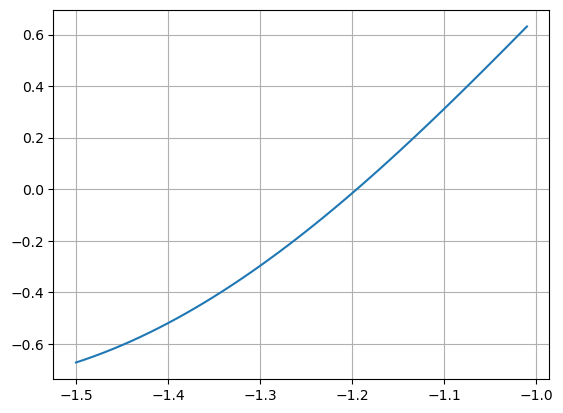

In [212]:
plt.plot(y, f1(y))
plt.grid()
plt.show()

In [5]:
eps = 0.001
b = -1.0 
a = -1.5
c = 0

In [6]:
while np.abs((b - a)) > eps:
    c = (a + b) / 2
    if f(a) * f(c) < 0:
        b = c
    else :
        a = c

In [7]:
c

-1.1943359375

In [8]:
f(c)

0.0016989184210409736

In [9]:
fsolve(f1, (-1.5, -1.0))

array([-1.19488468, -1.19488468])

# 2) Метод Ньютона–Рафсона (касательных)

In [260]:
x = sp.Symbol('x')

In [261]:
f = -((5 * x )/(1 + x * x)) + 2 * sp.cos(2 * x) - 1

In [262]:
a = -1.5
b = -1.0

In [269]:
eps = 0.001
x0 = (a + b) / 2
x1 = x0 + 2 * eps

In [274]:
d = sp.diff(f)
while(np.abs((x1 - x0)) > eps):
    x0 = x1
    x1 = x0 - f.subs(x, x0)/d.subs(x, x0)
x1

-1.19488468380594

In [276]:
f.subs(x, x1), f.subs(x, x1) < eps

(4.80429029892093e-11, True)

# 3) Метод секущих (хорд)

In [336]:
x = sp.Symbol('x')

In [337]:
f = -((5 * x )/(1 + x * x)) + 2 * sp.cos(2 * x) - 1

In [338]:
y = np.arange(-1.5, -1, 0.01)

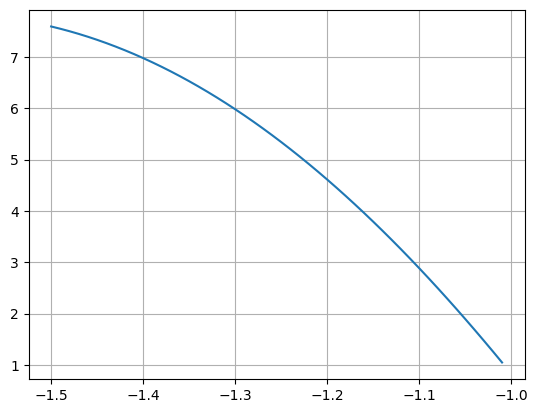

In [339]:
d = sp.diff(f)
dd = sp.diff(d)
f2 = sp.lambdify(x, dd)

plt.plot(y, f2(y))
plt.grid()
plt.show()

In [340]:
a = -1.5
b = -1.0

In [341]:
eps = 0.001
x0 = a
x1 = x0 + 2 * eps

In [342]:
d = sp.diff(f)
while(np.abs((x1 - x0)) > eps):
    x0 = x1
    x1 = x0 - f.subs(x, x0)/(f.subs(x, b) - f.subs(x, x0))*(b - x0)
x1

-1.19493995672502

In [359]:
f.subs(x, x1), f.subs(x, x1) < eps

(-0.000171049303562487, True)

# 4) Комбинированный метод

In [398]:
x = sp.Symbol('x')

In [399]:
f = -((5 * x )/(1 + x * x)) + 2 * sp.cos(2 * x) - 1

In [401]:
a = -1.5
b = -1.0

In [402]:
eps = 0.001
x0 = a
x1 = x0 + 2 * eps
x_0 = b
x_1 = x_0 - 2* eps

In [403]:
d = sp.diff(f)
while(np.abs((x1 - x0)) > eps):
    x0 = x1
    x1 = x0 - f.subs(x, x0)/(f.subs(x, b) - f.subs(x, x0))*(b - x0)
    x_0 = x_1
    x_1 = x_0 - f.subs(x, x_0)/d.subs(x, x_0)
solution = (x1 + x_1) / 2

In [404]:
f.subs(x, solution), f.subs(x, solution) < eps

(-8.55263821395447e-5, True)

# 5) Метод простых итераций

In [289]:
x = sp.Symbol('x')

In [290]:
f = -((5 * x )/(1 + x * x)) + 2 * sp.cos(2 * x) - 1

In [291]:
lambd = -0.02

In [292]:
phi = x + lambd * f

In [293]:
y = np.arange(-1.5, -1.0, 0.01)

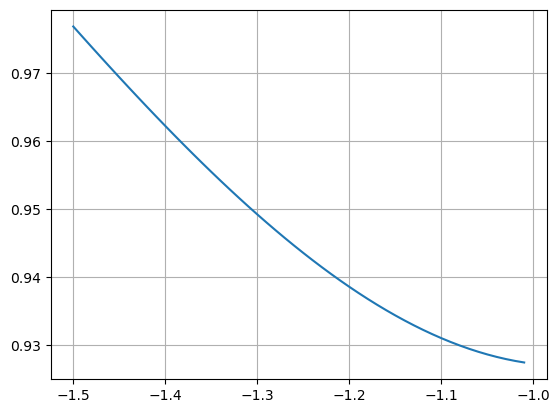

In [294]:
d = np.abs(sp.diff(phi))
#f1 = sp.lambdify(x, phi)
f2 = sp.lambdify(x, d)

plt.plot(y, f2(y))
plt.grid()
plt.show()

In [295]:
a = -1.5
b = -1.0
q = d.subs(x, -1.5)

In [296]:
eps = 0.001
x0 = (a + b) / 2
#x1 = x0 + 2 * eps
x1 = phi.subs(x, x0)

In [297]:
while(q * np.abs(x0 - x1) / (1 - q) > eps):
    x0 = x1
    x1 = phi.subs(x, x0)
x1

-1.19491952706180

In [298]:
'{:.3f}'.format(f.subs(x, x1)), np.abs(float('{:.3f}'.format(f.subs(x, x1)))) <= eps

('-0.0001', True)

# 6) Метод Ньютона 

In [204]:
from sympy.matrices import Matrix

In [205]:
x, y = sp.symbols("x, y")

In [206]:
f1 = sp.sin(x + sp.pi/2) + y - 1.5
f2 = sp.cos(y + sp.pi/2 - 0.5) + 2 * x - 1

In [207]:
df1x = sp.diff(f1, x)
df1y = sp.diff(f1, y)
df2x = sp.diff(f2, x)
df2y = sp.diff(f2, y)
df1x, df1y, df2x, df2y

(-sin(x), 1, 2, -cos(y - 0.5))

In [208]:
I = Matrix([[df1x, df1y],[df2x, df2y]])
I

Matrix([
[-sin(x),             1],
[      2, -cos(y - 0.5)]])

In [209]:
eps = 0.001
x0 = Matrix([0, 0])
x1 = Matrix([2 * eps, 2 * eps])
f = Matrix([f1, f2])

In [210]:
while((np.abs(x1[0] - x0[0]) > eps) and np.abs((x1[1] - x0[1])) > eps):
    x0 = x1
    x1 = x0 - (I.subs({x:x0[0], y:x0[1]}).inv()) * f.subs({x:x0[0], y:x0[1]})
x1

Matrix([
[ 0.58192615175504],
[0.664594478362832]])

In [211]:
f.subs({x:x0[0], y:x0[1]})

Matrix([
[-2.48491398713302e-6],
[ 2.52476526380052e-6]])

# 7) Метод спуска

In [331]:
from sympy.matrices import Matrix

In [332]:
x, y = sp.symbols("x, y")

In [333]:
f1 = sp.sin(x + sp.pi/2) + y - 1.5
f2 = sp.cos(y + sp.pi/2 - 0.5) + 2 * x - 1
f = Matrix([f1, f2])

In [334]:
phi = f1 * f1 + f2 * f2

In [335]:
d_phi_x = sp.diff(phi, x)
d_phi_y = sp.diff(phi, y)
grad = Matrix([d_phi_x, d_phi_y])

In [336]:
eps = 0.001
alpha = 0.5
x0 = Matrix([0, 0])
x1 = x0 - alpha * grad.subs({x:x0[0], y:x0[1]})

In [337]:
while(phi.subs({x:x1[0], y:x1[1]}) > (2 * eps * eps)):
    if phi.subs({x:x1[0], y:x1[1]}) < phi.subs({x:x0[0], y:x0[1]}):
        x0 = x1
        x1 = x0 - alpha * grad.subs({x:x0[0], y:x0[1]})
    else:
        alpha /= 2
        x1 = x0 - alpha * grad.subs({x:x0[0], y:x0[1]})
        print('alpha = ', alpha)
x1

alpha =  0.25
alpha =  0.125


Matrix([
[0.580671552761276],
[0.662633563837484]])

In [338]:
f1.subs({x:x1[0], y:x1[1]}), f2.subs({x:x1[0], y:x1[1]})

(-0.00127200182292209, -0.000574471671186683)